# Tautochrone problem

In [13]:
import matplotlib.pyplot as plt
print("matplotlib installed successfully")

matplotlib installed successfully


In [14]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

plt.close('all')
plt.rc('font', size=16)

In [16]:
# hit bottom at x=30
x1 = 30
phi1 = np.pi

a = x1/(phi1 - np.sin(phi1))


In [17]:
def cyk(x):
    p = fsolve(lambda p: a*(p-np.sin(p))-x,2)[0]
    y = a * (1 + np.cos(p))
    return y

In [18]:
def d_cyk_dx(x):
    dx = 0.00001
    return (cyk(x+dx) - cyk(x) ) / dx

In [19]:
g = 9.8

tinit = 0
tfinal = 4
trange = [tinit,tfinal]

tdelta = 0.1

def dxdt(t, p, y, dydx, yinit):
    x = p[0]
    dxdt = np.sqrt(2*g) * np.sqrt(0.000000001 + yinit - y) / np.sqrt(1 + dydx**2)
    return dxdt

def hit_x1(t, p):
    x = p[0]
    return x - x1

class Box():
    
    def __init__(self, y, dydx, xinit, times_for_plot):
        self.y = y
        self.dydx = dydx
        self.xinit = xinit
        self.yinit = y(xinit)
        self._ready = False
        self.drawing_elements = {}
        self.times_for_plot = times_for_plot
                 
    def _solve_eq_of_motion(self):
        mysol = solve_ivp(lambda t, p: dxdt(t, p, self.y(p[0]), self.dydx(p[0]), self.yinit),
                          trange, [self.xinit],
                          max_step=1e-3,
                          t_eval=self._times_for_plot,
                          events=[hit_x1])
        self._ts = mysol.t
        self._xs = mysol.y[0]
        self._ys = [self.y(x) for x in self._xs]
        
        self._t_hit_x1 = mysol.t_events[0]
        
        self._ready = True
        
    @property
    def ts(self):
        if not self._ready:
            self._solve_eq_of_motion()
        return self._ts
    
    @property
    def xs(self):
        if not self._ready:
            self._solve_eq_of_motion()
        return self._xs
    
    @property
    def ys(self):
        if not self._ready:
            self._solve_eq_of_motion()
        return self._ys
    
    @property
    def t_hit_x1(self):
        if not self._ready:
            self._solve_eq_of_motion()
        return self._t_hit_x1
    
    @property
    def times_for_plot(self):
        return self._times_for_plot
    
    @times_for_plot.setter
    def times_for_plot(self,new_times):
        self._times_for_plot = new_times
        self._ready = False
        
    def draw(self, ax, time):
        if not self._ready:
            self._solve_eq_of_motion()
        if not self.drawing_elements.get(ax,None):
            self.drawing_elements[ax] = ax.plot(self.xinit,self.yinit,'o',ms=20,alpha=0.3)[0]
        drawing_element = self.drawing_elements[ax]
        indices = [i for i,bool in zip(range(len(self.times_for_plot)),
                                       self.times_for_plot==time) if bool]
        assert len(indices)==1, f'problem with time {time}'
        i = indices[0]
        drawing_element.set_data(self.xs[i],self.ys[i])
        return drawing_element

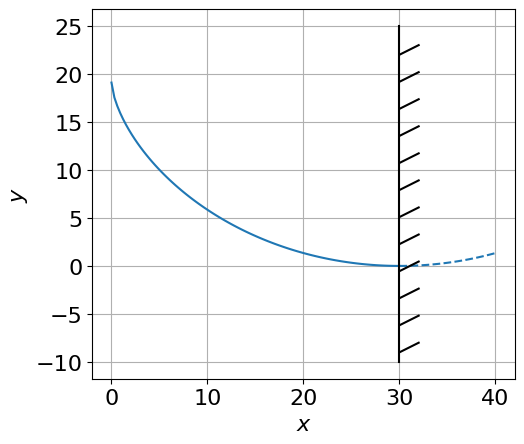

In [20]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.grid()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

xs = np.linspace(0,30,100)
ax.plot(xs,[cyk(x) for x in xs])
xs = np.linspace(30,40,100)
ax.plot(xs,[cyk(x) for x in xs],color='C0',linestyle='dashed')
ax.plot([30, 30],[-10, 25], color='k')
for y00 in np.linspace(-9, 22, 12):
    ax.plot([30, 32],[y00,y00+1], color='k')

In [21]:
times = np.arange(0, 4, 0.1)
boxes = [Box(cyk, d_cyk_dx, x, times) for x in [1, 2, 4, 8]]
for box in boxes:
    print(box.t_hit_x1)


[3.10119739]
[3.10119444]
[3.10118855]
[3.10117643]


In [22]:
for box in boxes:
    box.draw(ax, 0)
fig

RuntimeError: x must be a sequence

In [ ]:
from matplotlib import animation
plt.rc('animation', html='jshtml')

N = len(times)
def update(i):
    i -= 10
    i = min(i, N-1)
    i = max(i, 0)
    time = times[i]
    all_balls = []
    for box in boxes:
        ball = box.draw(ax,time)
        all_balls.append(ball)
    return all_balls

anim = animation.FuncAnimation(fig,
                               update,
                               frames=2*N,
                               interval=50,
                               blit=True)
anim

In [ ]:
upper_time = boxes[0].t_hit_x1[0]
N = 20
times = np.linspace(0, upper_time, N)
print(times)

In [ ]:
for box in boxes:
    box.times_for_plot = times

anim = animation.FuncAnimation(fig,
                               update,
                               frames=2*N,
                               interval=50,
                               blit=True)
anim

In [ ]:
writer = animation.writers['pillow'](fps=10) # frames per second
anim.save('exercise_05_fig1.gif', writer=writer)

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.grid()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

xs = np.linspace(0,30,100)
ax.plot(xs,[cyk(x) for x in xs])
xs = np.linspace(30,40,100)
ax.plot(xs,[cyk(x) for x in xs],color='C0',linestyle='dashed')
ax.plot([30, 30],[-10, 25], color='k')
for y00 in np.linspace(-9, 22, 12):
    ax.plot([30, 32],[y00,y00+1], color='k')

In [ ]:
for box in boxes:
    box.draw(ax, 0)
fig

In [ ]:
boxes[0].drawing_elements

In [ ]:
for key in boxes[0].drawing_elements:
    print(id(key))

In [ ]:
a = [1.001, 2, 2.999]
indices = np.where(a == 2)
indices

In [ ]:
indices

In [ ]:
a = [1.001, 2, 2.999]
indices = np.where(np.isclose(a, 2))[0]
print(indices)